<a href="https://colab.research.google.com/github/CapMarko/Assingment_1/blob/main/Machine_Learning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [11]:
cols = ["flength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

,flength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [13]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [14]:
# transform class into numeric data (g=1, h=0)
df["class"] = (df["class"] == "g").astype(int)

In [15]:
df.head()

,flength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
# Plot if labels have anything to do with class (use density to normalize data, makes it better to compare)
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Plot if labels have anything to do with class
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density = False)
  plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density = False)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [16]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [17]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) # take more of the less class and keep sampling from there to increase the amount of this class to fit the numbers of entry from each class

  data = np.hstack((X, np.reshape(y, (-1, 1)))) #side by side with hstack

  return data, X, y

In [18]:
# different number of 1 and 0, can become an issue --> by oversampling you can increase class 0 so that numbers match
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))

7417
3995


In [19]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [20]:
# amount of class 1 and class 0 is evenly balanced 
print(sum(y_train==1))
print(sum(y_train==0))

7417
7417


#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
# accuracy 0.82 (relatively good) 
# precision --> how many of those are true positive
# recall --> how many did we get right
# f1-score --> combination of precision and recall
from inspect import classify_class_attrs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1337
           1       0.87      0.88      0.88      2467

    accuracy                           0.84      3804
   macro avg       0.82      0.82      0.82      3804
weighted avg       0.84      0.84      0.84      3804



([<matplotlib.axis.XTick at 0x7f2188bd4490>,
 <a list of 5 Text major ticklabel objects>)

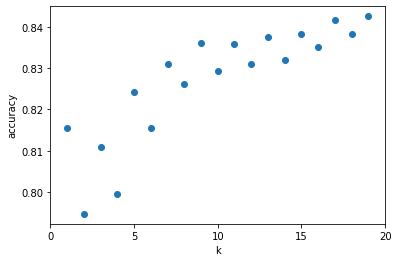

In [30]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

#Naive Bayes